In [6]:
import numpy as np 
import matplotlib.pyplot as plt
# from utils import *
plt.rcParams['text.usetex'] = True 
%run utils-singlepulse.py

In [74]:
np.pi/2+0.12

1.6907963267948967

In [75]:

%run utils-singlepulse.py

location = [True, False]
pulsecount = 0
INeuron = {
    'V0': -70,
    'Vq': -60,
    'Vinit':-70,
    'w1': 15,
    'w2': 15,
    'tau': 1, 
    'refr':25000,
    'tmax': 100,
    'dt':.001,
    'k':10,
    'window': 200,
    'lag':300,
    'OutA': 20
    }
azmt = np.pi/2
theta_tune= [azmt]
r2_coords = (10, np.pi)  # 60°
r1_coords = (10, 0)  # 45°
while location != [True, True]:
    # Example: Spherical (r, theta) in radians
    source_coords = (20, 3*np.pi/2)# origin
    # polarscatter(source_coords[1],pulsecount, [r1_coords, r2_coords, source_coords])
    timeprms = {
        'tmax' :100, 
        'dt': 0.001,
        'pulse_time' : 20,
        'window':10
        }
    # Run simulation
    time, source_ts, r1_ts, r2_ts = pulse_response(source_coords, 
                                                r1_coords, r2_coords, timeprms)
    Rout = {'I1':r1_ts, 'I2':r2_ts}
    INeuron.update(Rout)
    t, Iout, V_I = LIFNeuron(INeuron)
    O1Neuron = {
        'V0': -70,
        'Vq': -55,
        'Vinit':-70,
        'w1': 10,
        'w2': 2,
        'tau': 1, 
        'refr':3000, 
        'tmax': 100,
        'dt':.001,
        'k':10,
        'window': 200,
        'lag':500,
        'I1': Rout['I1'],
        'I2': Iout,
        'OutA': 20
        }
    O2Neuron = {
        'V0': -70,
        'Vq': -55,
        'Vinit':-70,
        'w1': 10,
        'w2': 2,              
        'tau': 1, 
        'refr':3000, 
        'tmax': 100,
        'dt':.001,
        'k':10,
        'window': 200,
        'lag':500,
        'I1': Rout['I2'],
        'I2': Iout,
        'OutA': 20
        }
    
    t_O1, O1out, V_O1 = LIFNeuron(O1Neuron)
    t_O2, O2out, V_O2 = LIFNeuron(O2Neuron)
    O1 = True if np.sum(O1out) != 0 else False
    O2 = True if np.sum(O2out) != 0 else False
    # O1 = True; O2 = True
    location = [O1, O2]
    deltatheta = (np.pi/2)*np.exp(-pulsecount)
    if (O1 == True) & (O2 == False): #source on 
        #receptor update:   
        r1_coords = (10,r1_coords[1]-deltatheta)
        r2_coords = (10,r2_coords[1]-deltatheta)
        theta_tune.append(theta_tune[-1]-deltatheta)
    elif (O1 == False) & (O2 == True): #source on 
        #receptor update:   
        r1_coords = (10,r1_coords[1]+deltatheta)
        r2_coords = (10,r2_coords[1]+deltatheta)
        theta_tune.append(theta_tune[-1]+deltatheta)
    elif (O1 == False) & (O2 == False):
        print(pulsecount, 'Double False Error')
        break
    else:# (O1 == False) & (O2 == False):
        print(pulsecount,'Target located')
    
    print(pulsecount, location, deltatheta)
    pulsecount += 1

    
#update the theta postition, rewrite  rece;ptor neuron fn
        

0 Double False Error


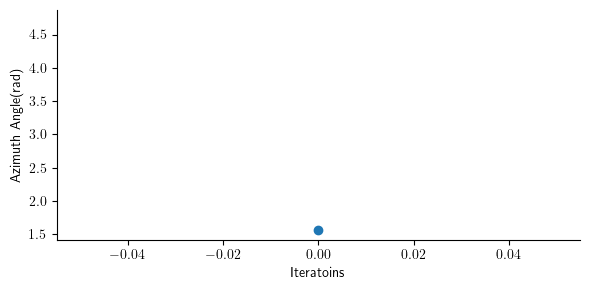

In [77]:
iterations = np.arange(0, pulsecount+1, 1)
plt.figure(figsize=(6,3))
plt.plot(iterations,theta_tune, 'o', markersize=6)
plt.plot(iterations,theta_tune, linewidth=.5)
plt.plot(iterations, source_coords[-1]*np.ones_like(iterations), '--', linewidth=1)
plt.xlabel('Iteratoins')
plt.ylabel('Azimuth Angle(rad)')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f'{source_coords[1]:.2f}_convrg.png', dpi=450)

In [ ]:
plt.plot(time, r1_ts-60)
plt.plot(time, r2_ts-60)
plt.plot(time, Iout-60)
plt.plot(time, V_O1)
plt.plot(time, V_O2)